In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\Users\MULA SHIVA KUMAR\Downloads\housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Task1 :
Display the structure of the housing data and calculate descriptive statistics for the
numerical columns (mean, median, standard deviation, maximum and minimum).
• How many rows and columns are in this dataset?
• Create a frequency table showing the unique values of the ocean proximity variable and the
number of times these values occur in the dataset.
• Create a pie chart showing the breakdown of the categories in the ocean proximity variable.
Display the percentage of each category on the pie chart. Interpret the plot.

In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
data.shape

(20640, 10)

In [6]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

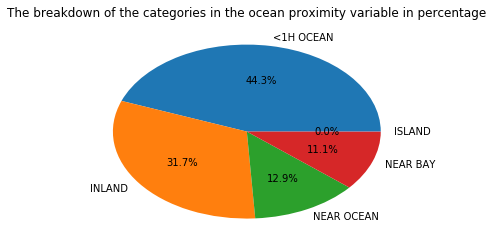

In [7]:
vals = [9136,6551,2658,2290,5]
label = ['<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND']
plt.pie(x=vals,labels= label,autopct="%0.1f%%")
plt.title("The breakdown of the categories in the ocean proximity variable in percentage")
plt.show()

2 task
• How many values are missing from the total bedrooms variable? Print out the first 5 rows in
the housing data with missing values for this variable.
• Create a violin plot showing how the distribution of median house value differs across the
location of the block with respect to the ocean. Interpret the plot.

In [8]:
data['total_bedrooms'].isnull().sum()

207

In [9]:
data[data['total_bedrooms'].isnull()==True].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


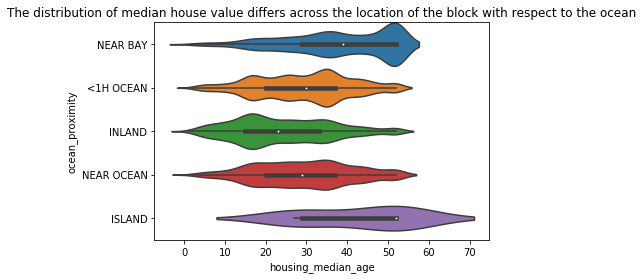

In [10]:
sns.violinplot(x=data.housing_median_age,y = data.ocean_proximity,width=1)
plt.title("The distribution of median house value differs across the location of the block with respect to the ocean")
plt.show()

3 task
.Add a new column (age_category) to the housing data that classifies each block into one of
five categories depending upon the median age of a house:
o 0-10 years – Cat 1
o 10-20 years – Cat 2
o 20-30 years – Cat 3
o 30-40 years – Cat 4
o > 40 years – Cat 5
• Print out the median age of a house and the age category for the first 10 rows in the dataset
• Create a grouped bar chart showing the breakdown of the age_category variable for each
category in the ocean proximity variable (i.e. put ocean proximity on the x-axis and
age_category in the bars). Interpret the plot.

In [11]:
data['age_category'] = pd.cut(x=data['housing_median_age'], bins=[0,10,20,30,40,100], labels=['Cat_1','Cat_2','Cat_3','Cat_4','Cat_5'])

In [12]:
data[["housing_median_age","age_category"]].head(10)

,housing_median_age,age_category
0,41.0,Cat_5
1,21.0,Cat_3
2,52.0,Cat_5
3,52.0,Cat_5
4,52.0,Cat_5
5,52.0,Cat_5
6,52.0,Cat_5
7,52.0,Cat_5
8,42.0,Cat_5
9,52.0,Cat_5


Create a grouped bar chart showing the breakdown of the age_category variable for each
category in the ocean proximity variable (i.e. put ocean proximity on the x-axis and
age_category in the bars). Interpret the plot.

In [13]:
#plt.bar(x=data['ocean_proximity'],height=data['ocean_proximity'])
#plt.bar(x=data['age_category'],height=data['age_category'])
#plt.figure(figsize = (20,10))

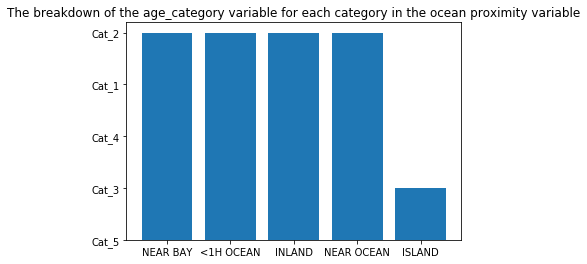

In [14]:
plt.bar(x=data['ocean_proximity'],height=data['age_category'])
plt.title("The breakdown of the age_category variable for each category in the ocean proximity variable")
plt.show()

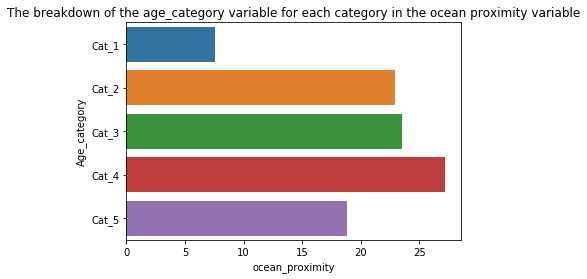

In [39]:
ax = sns.barplot(x=data['ocean_proximity'], y=data['age_category'], estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Age_category")
plt.title("The breakdown of the age_category variable for each category in the ocean proximity variable")
plt.show()

Task 4 (10 marks) 
• Investigate the relationship between total bedrooms (x-axis) and median house value (y- axis) by creating a scatter plot with a linear regression line through it and a joint plot. Comment on what the plots say about this relationship. 
• Filter the housing data so it only contains census blocks with a median income above $60,000 USD and a median house age less than 5 years. Print the first 5 rows of this filtered dataset. How many census blocks are in this filtered dataset? 
• Randomly sample 500 rows from the housing dataset and store them in a variable. Print out the first 10 rows of this dataset. 
• Create a scatter plot showing the relationship between total rooms (x-axis) and median house value (y-axis) for the randomly sampled data, colouring points on the chart based on a census block’s median income. Interpret the plot. 


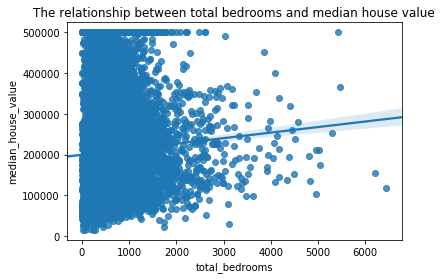

In [15]:
sns.regplot(data=data,x='total_bedrooms',y='median_house_value')
plt.title("The relationship between total bedrooms and median house value")
plt.show()

Filter the housing data so it only contains census blocks with a median income above $60,000 USD and a median house age less than 5 years. Print the first 5 rows of this filtered dataset. How many census blocks are in this filtered dataset? 

In [16]:
#median income for households within a block of houses (measured in tens of thousands of US Dollars)
X=data[(data['housing_median_age']<5) & (data['median_income']>6)].reset_index(drop=True)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,age_category
0,-122.07,37.52,3.0,14014.0,2861.0,7205.0,2753.0,6.0824,273500.0,NEAR BAY,Cat_1
1,-121.85,37.68,4.0,4719.0,741.0,1895.0,742.0,6.8132,282500.0,INLAND,Cat_1
2,-122.00,38.03,4.0,2341.0,408.0,1235.0,431.0,6.0424,165900.0,INLAND,Cat_1
3,-121.95,37.78,4.0,14652.0,2826.0,5613.0,2579.0,6.3942,356700.0,<1H OCEAN,Cat_1
4,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001,350000.0,<1H OCEAN,Cat_1


In [17]:
X.shape

(84, 11)

### There are 84 census blocks are in this filtered dataset

In [18]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'age_category'],
      dtype='object')

In [19]:
a = data.sample(n = 500, random_state = 2)
a.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,age_category
10385,-117.65,33.60,15.0,5736.0,NaN,2529.0,762.0,6.4114,278700.0,<1H OCEAN,Cat_2
1943,-120.91,38.62,12.0,4545.0,748.0,2033.0,718.0,4.1843,207600.0,INLAND,Cat_2
7490,-118.23,33.93,35.0,1149.0,277.0,909.0,214.0,1.7411,96700.0,<1H OCEAN,Cat_4
16889,-122.37,37.59,39.0,4645.0,1196.0,2156.0,1113.0,3.4412,353800.0,NEAR OCEAN,Cat_4
11416,-117.98,33.70,16.0,5127.0,631.0,2142.0,596.0,7.8195,390500.0,<1H OCEAN,Cat_2
10297,-117.88,33.92,13.0,3292.0,727.0,1565.0,698.0,5.4570,308800.0,<1H OCEAN,Cat_2
16843,-122.44,37.63,35.0,5113.0,959.0,3004.0,964.0,4.7625,281300.0,NEAR OCEAN,Cat_4
11528,-118.08,33.77,26.0,2013.0,551.0,664.0,510.0,2.2708,67500.0,<1H OCEAN,Cat_3
18951,-122.05,38.25,37.0,1336.0,251.0,680.0,231.0,3.8150,99000.0,INLAND,Cat_4
3728,-118.43,34.18,31.0,2417.0,510.0,1102.0,507.0,3.8906,282200.0,<1H OCEAN,Cat_4


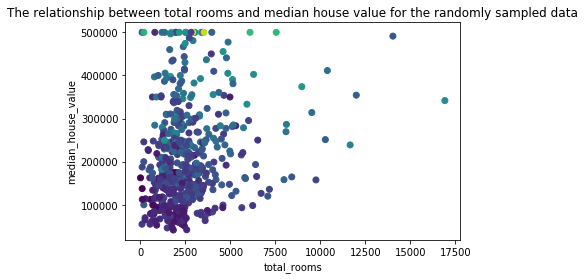

In [20]:
plt.scatter(x='total_rooms',y='median_house_value',c='median_income',data=a)
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.title("The relationship between total rooms and median house value for the randomly sampled data")
plt.show()

Task 5 (10 marks) 
• Calculate the number of people per household for each census block. Print out the top ten census blocks with the largest number of people per household. What do you notice? 
• Plot a histogram of the number of people per household and display its mean and median as straight and dashed lines respectively on the plot. Include the actual values of the mean and median in the legend. 
• Create the same histogram, but this time only include census blocks with less than 10 people per household. Which plot do you prefer and why? 
• Compare the data of the ten census blocks over the entire housing dataset with the lowest median income with the data of ten census blocks with the highest median income. 

In [21]:
number_of_people_per_household = data.population/data.households

In [22]:
number_of_people_per_household.sort_values(axis=0, 
                 ascending=False, inplace=True)

In [23]:
number_of_people_per_household.nlargest(10)

19006    1243.333333
3364      599.714286
16669     502.461538
13034     230.172414
9172       83.171429
12104      63.750000
16420      51.400000
8874       41.214286
13366      33.952941
5986       21.333333
dtype: float64

In [24]:
median = number_of_people_per_household.median()

In [25]:
mean = number_of_people_per_household.mean()

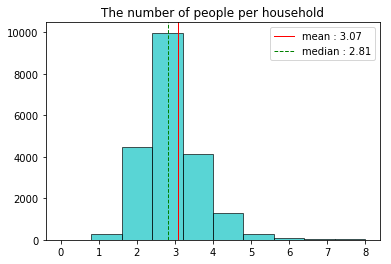

In [26]:
result = plt.hist(number_of_people_per_household,range=[0, 8], color='c', edgecolor='k', alpha=0.65)
plt.axvline(mean, color='r', linestyle='solid', linewidth=1)
plt.axvline(median, color='g', linestyle='dashed', linewidth=1)
plt.legend({'mean : 3.07':mean,'median : 2.81':median})
plt.title("The number of people per household")
plt.show()

In [27]:
c = []
for i in range(len(number_of_people_per_household)):
    #print(number_of_people_per_household[i])
    if (number_of_people_per_household[i]<10) ==True:
        c.append(number_of_people_per_household[i])
    

In [28]:
z = pd.DataFrame(c)

In [29]:
mean_z = z[0].mean()

In [30]:
mean_z

2.9185174863869157

In [31]:
median_z = z[0].median()

In [32]:
median_z

2.817258883248731

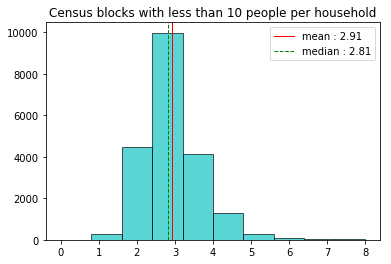

In [33]:
result = plt.hist(z[0],range=[0, 8],color='c', edgecolor='k', alpha=0.65)
plt.axvline(mean_z, color='r', linestyle='solid', linewidth=1)
plt.axvline(median_z, color='g', linestyle='dashed', linewidth=1)
plt.legend({'mean : 2.91':mean,'median : 2.81':median})
plt.title("Census blocks with less than 10 people per household")
plt.show()

In [34]:
data['median_income'].nlargest(10)

1566    15.0001
4352    15.0001
4604    15.0001
4605    15.0001
4606    15.0001
4626    15.0001
4678    15.0001
5242    15.0001
5247    15.0001
5248    15.0001
Name: median_income, dtype: float64

In [35]:
data['median_income'].nsmallest(10)

73       0.4999
3249     0.4999
3258     0.4999
4861     0.4999
5213     0.4999
6343     0.4999
6688     0.4999
7125     0.4999
13999    0.4999
19523    0.4999
Name: median_income, dtype: float64